In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#넘파이 데이터 세트를 판다스 데이터프레임으로 변환
iris = load_iris(as_frame=True)
iris.data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [3]:
iris.data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris.data

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
iris.data['target'] = iris.target
iris.data.head(2)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


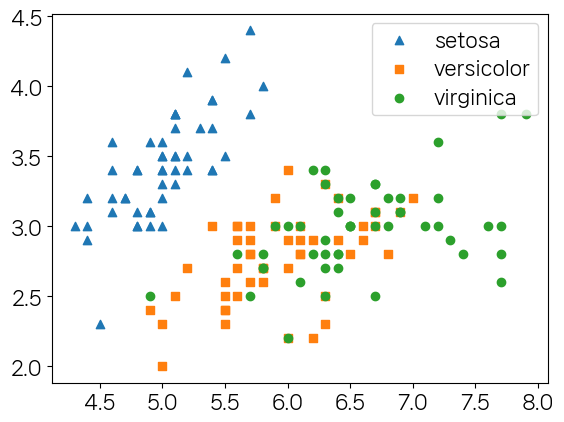

In [6]:
markers=['^','s','o']
for i, marker in enumerate(markers):
    df = iris.data
    x = df[df['target']==i]['sepal length']
    y = df[df['target']==i]['sepal width']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
df_scaled = StandardScaler().fit_transform(df.iloc[:,:-1])
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(df_scaled)

In [11]:
iris_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [12]:
pca_columns = ['pca_com_1','pca_com_2']
df_pca = pd.DataFrame(iris_pca,columns=pca_columns)
df_pca['target']=iris.target
df_pca.head(2)

,pca_com_1,pca_com_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0


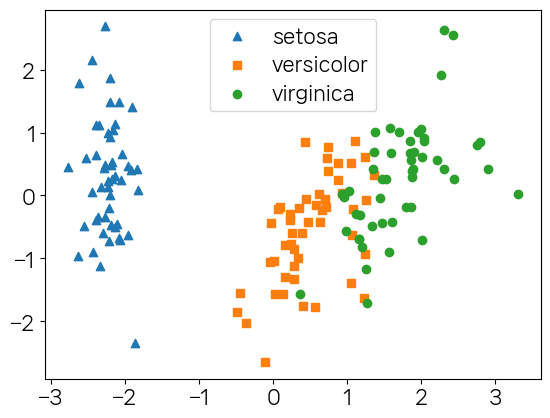

In [13]:
markers=['^','s','o']
for i, marker in enumerate(markers):
    df = iris.data
    x = df_pca[df_pca['target']==i]['pca_com_1']
    y = df_pca[df_pca['target']==i]['pca_com_2']
    plt.scatter(x,y,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.show()

In [14]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [17]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data.iloc[:,:-1],iris.target,scoring='accuracy',cv=3)
print(f'개별 정확도:{scores}, 평균 정확도 : {np.mean(scores)}')

개별 정확도:[0.98 0.94 0.96], 평균 정확도 : 0.96


In [18]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, df_pca.iloc[:,:-1],iris.target,scoring='accuracy',cv=3)
print(f'개별 정확도:{scores}, 평균 정확도 : {np.mean(scores)}')

개별 정확도:[0.88 0.88 0.88], 평균 정확도 : 0.88
